<a href="https://colab.research.google.com/github/huangliangc/Analysis_Projects/blob/main/Analysis_Project_4_Pokemon_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pycaret

In [4]:
pd.set_option('display.max_rows', 10)

In [5]:
from pycaret.datasets import get_data
data = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
...,...,...,...,...,...,...,...,...
51,gold,Multivariate,Regression,Gold_T+22,None,2558,121,N
52,house,Multivariate,Regression,SalePrice,None,1461,81,Y
53,insurance,Multivariate,Regression,charges,None,1338,7,N
54,parkinsons,Multivariate,Regression,PPE,None,5875,22,N


In [6]:
df = get_data('pokemon')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
df.shape

(800, 13)

In [8]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
           ... 
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, Length: 18, dtype: int64

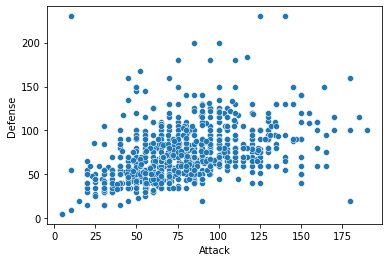

In [11]:
sns.scatterplot(x = 'Attack', y = 'Defense', data = df)

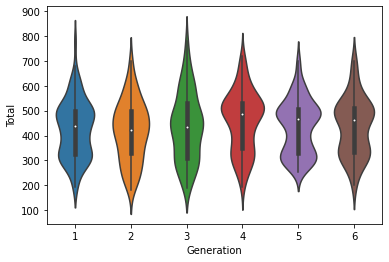

In [12]:
sns.violinplot(x = 'Generation', y = 'Total', data = df)

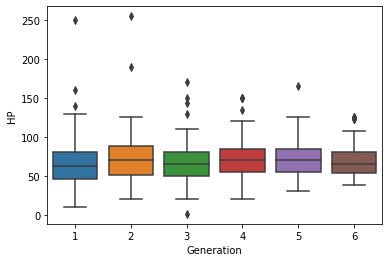

In [13]:
sns.boxplot(x = 'Generation', y = 'HP', data = df)

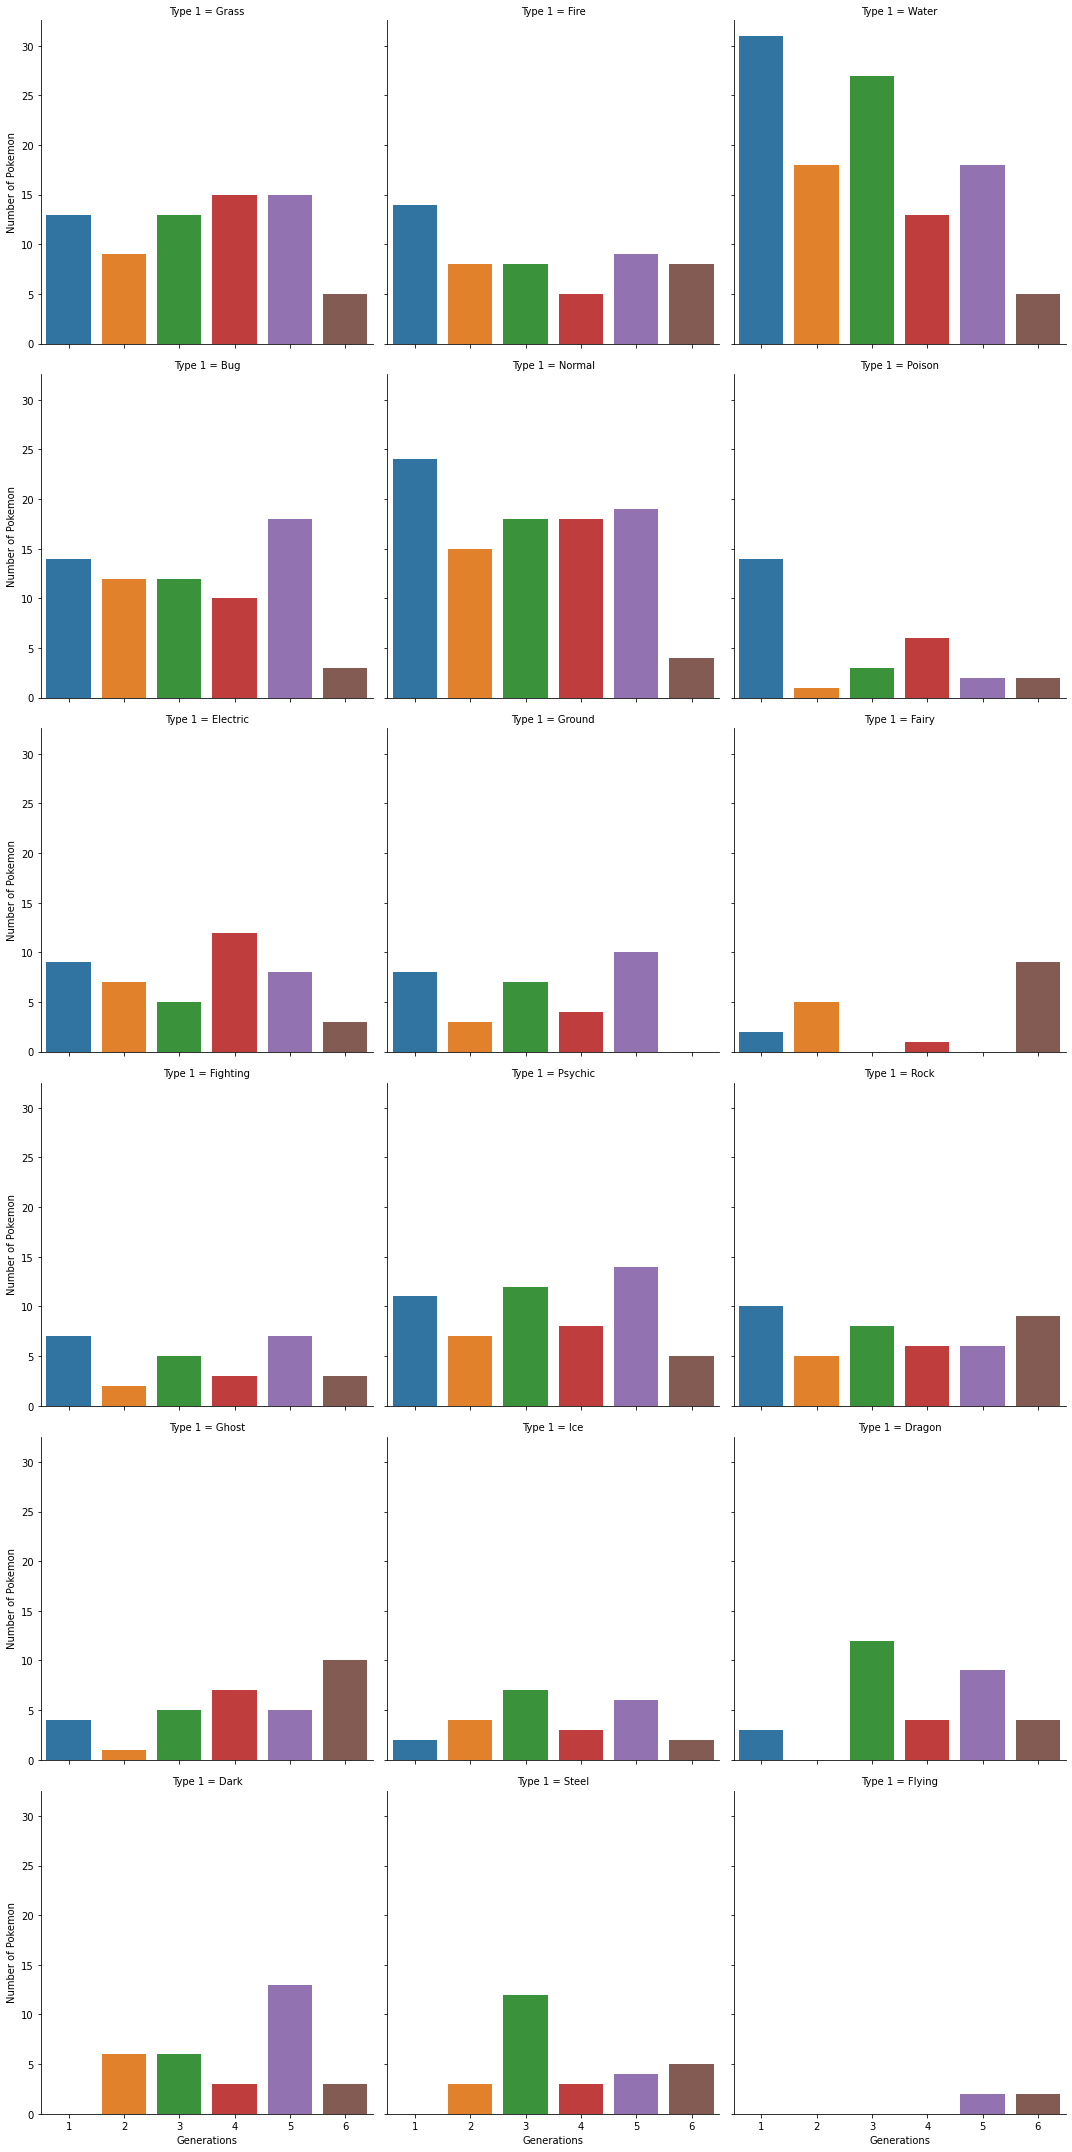

In [14]:
sns.factorplot(x = 'Generation', data = df, col = 'Type 1', kind = 'count', col_wrap = 3). set_axis_labels('Generations', 'Number of Pokemon')

In [15]:
gen = df.groupby(['Generation', 'Type 1']).size().reset_index(name = 'count')

In [16]:
gen[gen.Generation == 1]

,Generation,Type 1,count
0,1,Bug,14
1,1,Dragon,3
2,1,Electric,9
3,1,Fairy,2
4,1,Fighting,7
...,...,...,...
10,1,Normal,24
11,1,Poison,14
12,1,Psychic,11
13,1,Rock,10


In [17]:
df1 = df[df.Legendary == 1]

In [18]:
df1.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231
std,173.651095,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262
min,144.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000
25%,381.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000
50%,483.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000
75%,642.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000


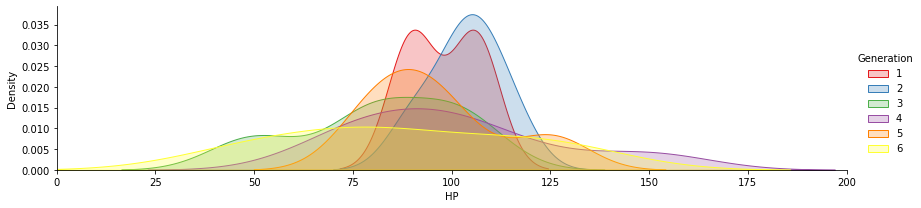

In [19]:
ax = sns.FacetGrid(df1, hue = 'Generation', aspect = 4, palette = 'Set1')
ax.map(sns.kdeplot, 'HP', shade = 1)
ax.set(xlim=(0, 200))
ax.add_legend()

In [20]:
df2 = df[df.Legendary == False]

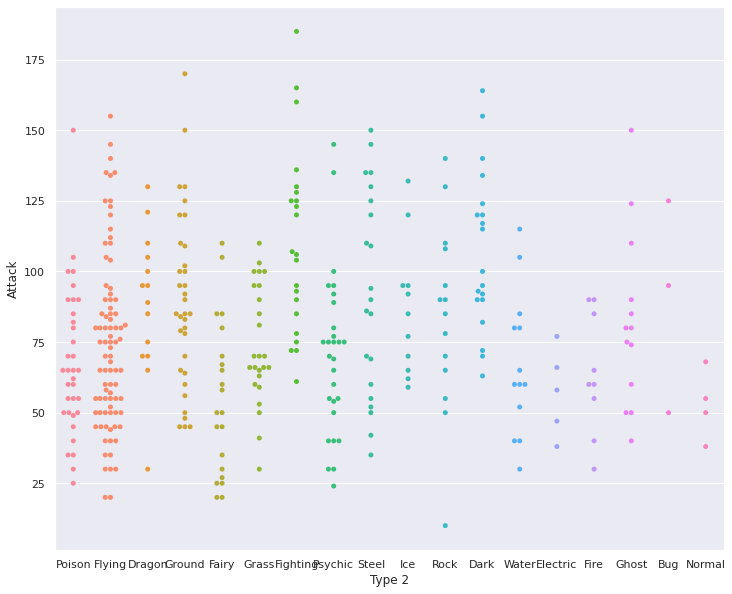

In [21]:
sns.set(rc={'figure.figsize':(12,10)})
sns.swarmplot(x = 'Type 2', y = 'Attack', data = df2)

In [ ]:
 pip install Jinja2

In [ ]:
!pip install numba==0.53

In [24]:
from pycaret.clustering import *

In [ ]:
clu1 = setup(df, ignore_features=['Type 2'], session_id=1, log_experiment=True, experiment_name='Pokem')

In [26]:
models()

INFO:logs:gpu_param set to False


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [27]:
kmeans = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3346,644.6734,0.9713,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [28]:
kmodes = create_model('kmodes', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0199,128.1547,2.2031,0,0,0


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KModes(cat_dissim=<function matching_dissim at 0x7fbda17e3430>, init='Cao',
       max_iter=100, n_clusters=4, n_init=1, n_jobs=-1, random_state=1,
       verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [29]:
kmeans_result = assign_model(kmeans)
kmeans_result.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(800, 14)
INFO:logs:assign_model() succesfully completed......................................


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Cluster 0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Cluster 0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Cluster 0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Cluster 0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Cluster 0


In [30]:
kmodes_result = assign_model(kmodes)
kmodes_result.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KModes(cat_dissim=<function matching_dissim at 0x7fbda17e3430>, init='Cao',
       max_iter=100, n_clusters=4, n_init=1, n_jobs=-1, random_state=1,
       verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Modes Clustering
INFO:logs:Copying data
INFO:logs:(800, 14)
INFO:logs:assign_model() succesfully completed......................................


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Cluster 3
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Cluster 3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Cluster 3
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Cluster 3
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Cluster 0


In [31]:
leg = predict_model(kmeans, data = df1)
leg.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1, tol=0.0001, verbose=0), ml_usecase=MLUsecase.CLUSTERING)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,Cluster 0
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,Cluster 0
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,Cluster 0
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,Cluster 1
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Cluster 1


In [32]:
leg1 = predict_model(kmodes, data = df1)
leg1.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KModes(cat_dissim=<function matching_dissim at 0x7fbda17e3430>, init='Cao',
       max_iter=100, n_clusters=4, n_init=1, n_jobs=-1, random_state=1,
       verbose=0), ml_usecase=MLUsecase.CLUSTERING)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,Cluster 1
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,Cluster 1
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,Cluster 1
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,Cluster 1
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Cluster 1


In [33]:
plot_model(kmeans)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(kmodes)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


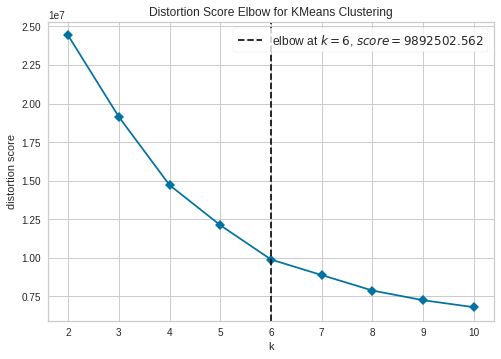

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(kmeans, plot = 'elbow')

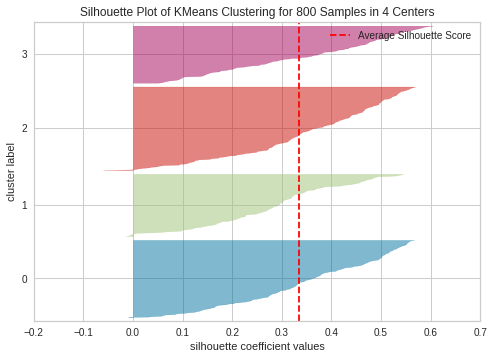

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [36]:
plot_model(kmeans, plot = 'silhouette')

In [37]:
plot_model(kmeans, plot = 'distribution')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


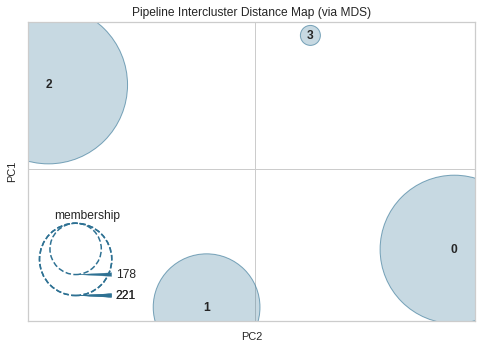

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [38]:
plot_model(kmeans, plot = 'distance')

In [39]:
plot_model(kmeans, plot = 'distribution', feature = 'Generation')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [40]:
plot_model(kmeans, plot = 'distribution', feature = 'Type 1')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [41]:
save_model(kmeans, 'Clu1')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1, tol=0.0001, verbose=0), model_name=Clu1, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Type 2'], id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numer

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Type 2'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numeric...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                